In [ ]:
#import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#1. Read the dataset
df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#2. Observe the shape of dataset
df.shape

(891, 12)

In [ ]:
#3. Observe the statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#4. Observe the number of Non-NULL and datatype of each feature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#5. Bifurcate the categorical and numerical features of the dataset
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Sex', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
#6. Observe the number of null (N/A) values for each feature
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#7. Observe the percentage of null (N/A) values for each feature
df.isnull().sum() * 100 / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
#8. Drop the "Ticket" and "Name" features from the dataset
drop_cat=['Ticket','Name']
df.drop(drop_cat, inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
#9. Drop the feature corresponding to the highest missing values
df1= df.drop(df[df["Cabin"].isnull()].index)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,D35,S
872,873,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,83.1583,C50,C
887,888,1,1,female,19.0,0,0,30.0000,B42,S


In [ ]:
#10. Drop the observations with missing values in the "Embarked" feature
df.dropna(subset=['Embarked'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,D35,S
872,873,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,83.1583,C50,C
887,888,1,1,female,19.0,0,0,30.0000,B42,S


In [ ]:
#11. Fill the missing values of the "Age" feature with mean value

df["Age"].fillna(df["Age"].mean(), inplace=True)
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,D35,S
872,873,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,83.1583,C50,C
887,888,1,1,female,19.0,0,0,30.0000,B42,S


{'whiskers': [<matplotlib.lines.Line2D at 0x7a027ed53e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7a027ed53790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a027ed53e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7a027ed506d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a02818e7a00>],
 'means': []}

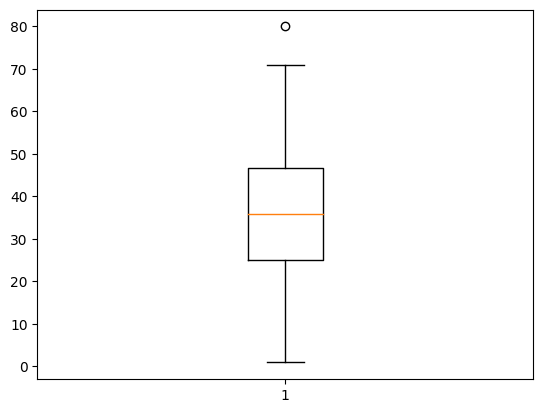

In [ ]:
plt.boxplot(df['Age'])

<Axes: ylabel='Age'>

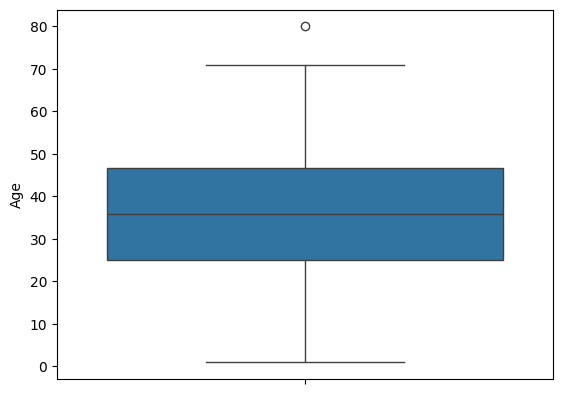

In [ ]:
#12. Observe the boxplot of the "Age" feature
sns.boxplot(df['Age'])

In [ ]:
#13. Nomalize the features with the numerical values using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = [col for col in df.columns if df[col].dtype != 'object']
x=df
x[numeric] = scaler.fit_transform(x[numeric])
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.510693,0.663366,0.099010,0.439669,0.148515,0.110149,0.148544
std,0.281198,0.473732,0.264103,0.188242,0.210163,0.183073,0.145922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294200,0.000000,0.000000,0.304502,0.000000,0.000000,0.056525
50%,0.512950,1.000000,0.000000,0.441443,0.000000,0.000000,0.107353
75%,0.765203,1.000000,0.000000,0.579540,0.333333,0.250000,0.175231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
